In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# index_col=0 : 0번째 열은 행번호로 처리
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv", index_col=0)
print(df.head())

# 결측치 확인
print(df.isnull().sum())

   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                               
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera_weight  Shell_weight  Rings  
id                                       
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [2]:
X = df.drop(['Rings'], axis=1) # 입력값
y = df['Rings'] # 출력값

# One-Hot Encoding하면서 Numpy으로 변환
X = pd.get_dummies(X, columns=["Sex"]).values # Sex : 문자 데이터이므로 인코딩
y = pd.get_dummies(y).values # 회귀 문제의 예측 대상 열은 문자 데이터인 경우에만 인코딩 필요.
print(X)
print(y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[0.455 0.365 0.095 ... False False True]
 [0.35 0.265 0.09 ... False False True]
 [0.53 0.42 0.135 ... True False False]
 ...
 [0.6 0.475 0.205 ... False False True]
 [0.625 0.485 0.15 ... True False False]
 [0.71 0.555 0.195 ... False False True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(2923, 10)
(2923, 28)
(1254, 10)
(1254, 28)


In [4]:
# 딥러닝
model = Sequential()

model.add(Dense(16,input_shape=(10,),activation='relu')) # 입력층 : 특성의 개수 10개
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # 회귀 문제의 출력층의 뉴런 개수는 1개 / 활성화 함수 : X / loss function은 mse

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

N_EPOCHS = 30
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1)
y_pred = model.predict(X_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1648 - mse: 0.1648 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss

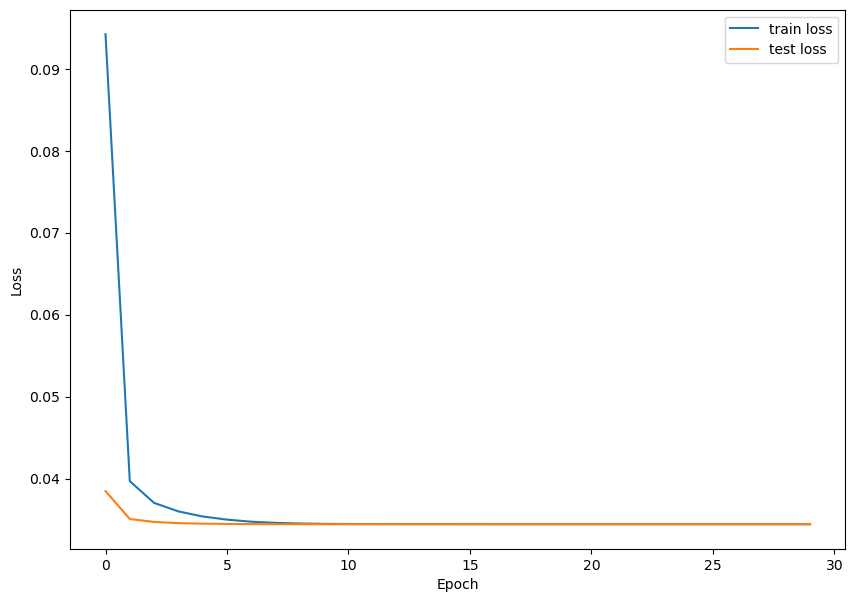

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.0344 - mse: 0.0344


[0.03444735333323479, 0.03444735333323479]

In [5]:
# 모델이 학습되는 동안의 손실(loss) 변화 과정을 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss') # .history['loss'] : 훈련 데이터에 대한 loss (epoch마다 측정됨)
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss') # .history['val_loss'] : 검증 데이터(validation_split로 나눈) loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 성능 평가
model.evaluate(X_test, y_test) # loss와 metrics으로 mse 값 출력